# Import libraries

In [84]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# # Import Dataset

In [85]:
df=pd.read_csv("gender_submission.csv")
x = df.iloc[:, [0,1]].to_numpy()
y = df.iloc[np.random.choice([0, 1], size=418), [0]].to_numpy()

# Split dataset into train and test set's

In [86]:
x_train = x[:80]
y_train = y[:80]
x_test = x[80:]
y_test = y[80:]

# Predict labels using K_nearest_neighbour

In [87]:
y_pred = k_nearest_neighbour(x_train, y_train, k)

# Calculate accuracy

In [90]:
accuracy = np.mean(y_pred == y_train)
print(f"Accuracy: {accuracy}")

Accuracy: 0.50125


# K Nearest Neighbour

In [89]:
def k_nearest_neighbour(x_train, y_train, k=3):
    
    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def prediction_of_sample(x):
        distances = [euclidean_distance(x, x_train[i]) for i in range(len(x_train))]
        sorted_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in sorted_indices]
        unique_labels, label_counts = np.unique(k_nearest_labels, return_counts=True)
        return unique_labels[np.argmax(label_counts)]
    
    # features Normalization
    x_train = (x_train - x_train.mean()) / x_train.std()
    
    y_pred = [ prediction_of_sample(x) for x in x_train]
    return np.array(y_pred)


# Data Visualization

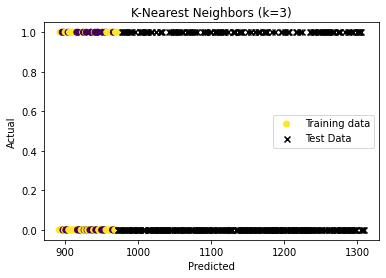

In [91]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_pred,marker='o',label='Training data')
plt.scatter(x_test[:, 0], x_test[:, 1], c='k', marker='x', label='Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f"K-Nearest Neighbors (k={k})")
plt.legend()
plt.show()
